# 피터와 늑대: 강화 학습 입문

이 튜토리얼에서는 경로 탐색 문제에 강화 학습을 적용하는 방법을 배워봅니다. 설정은 러시아 작곡가 [세르게이 프로코피예프](https://en.wikipedia.org/wiki/Sergei_Prokofiev)의 음악 동화 [피터와 늑대](https://en.wikipedia.org/wiki/Peter_and_the_Wolf)에서 영감을 받았습니다. 이 이야기는 어린 개척자 피터가 집을 나와 숲의 공터로 나가 늑대를 쫓는 용감한 모험을 다룹니다. 우리는 피터가 주변 지역을 탐험하고 최적의 내비게이션 지도를 구축할 수 있도록 돕는 머신 러닝 알고리즘을 훈련시킬 것입니다.

먼저, 유용한 라이브러리를 몇 가지 가져와 봅시다:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## 강화 학습 개요

**강화 학습**(Reinforcement Learning, RL)은 **환경**에서 **에이전트**의 최적 행동을 학습하기 위해 여러 실험을 실행하는 학습 기법입니다. 이 환경 속 에이전트는 **보상 함수**로 정의된 특정 **목표**를 가져야 합니다.

## 환경

간단히 말해, 피터의 세계를 `width` x `height` 크기의 정사각형 보드로 생각해 봅시다. 이 보드의 각 셀은 다음 중 하나일 수 있습니다:
* **땅** - 피터와 다른 생명체가 걸을 수 있는 곳
* **물** - 당연히 걸을 수 없는 곳
* **나무** 또는 **풀** - 쉴 수 있는 장소
* **사과** - 피터가 자신을 먹이기 위해 찾고 싶어하는 것
* **늑대** - 위험하므로 피해야 하는 존재

환경을 다루기 위해 우리는 `Board`라는 클래스를 정의할 것입니다. 이 노트북이 너무 복잡해지지 않도록, 보드와 관련된 모든 코드는 별도의 `rlboard` 모듈로 옮겨 두었습니다. 이제 이 모듈을 가져올 것입니다. 구현의 내부 세부 사항을 더 알고 싶다면 이 모듈을 살펴볼 수 있습니다.


이제 무작위 보드를 만들어보고 어떻게 보이는지 확인해봅시다:


In [4]:
# code block 1

## 행동과 정책

우리의 예시에서, 피터의 목표는 사과를 찾는 것이며, 늑대와 다른 장애물을 피하는 것입니다. 이러한 행동을 사전(dictionary)으로 정의하고, 해당 좌표 변화 쌍에 매핑하세요.


In [5]:
# code block 2

우리 에이전트(Peter)의 전략은 이른바 **정책(policy)**으로 정의됩니다. 가장 간단한 정책인 **랜덤 워크(random walk)**를 살펴보겠습니다.

## 랜덤 워크

먼저 랜덤 워크 전략을 구현하여 문제를 해결해 봅시다.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## 보상 함수

정책을 더 똑똑하게 만들기 위해서는 어떤 움직임이 다른 움직임보다 "더 나은지"를 이해해야 합니다.


In [8]:
#code block 5

## Q-러닝

Q-테이블 또는 다차원 배열을 만듭니다. 우리의 보드가 `width` x `height` 크기를 가지므로, Q-테이블은 `width` x `height` x `len(actions)` 형태의 numpy 배열로 표현할 수 있습니다:


In [9]:
# code block 6

Q-테이블을 `plot` 함수에 전달하여 보드에 테이블을 시각화하십시오:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Q-러닝의 본질: 벨만 방정식과 학습 알고리즘

우리의 학습 알고리즘을 위한 의사 코드 작성:

* 모든 상태와 행동에 대해 동일한 숫자로 Q-테이블 Q 초기화
* 학습률 $\alpha\leftarrow 1$ 설정
* 시뮬레이션을 여러 번 반복
   1. 랜덤 위치에서 시작
   1. 반복
        1. 상태 $s$에서 행동 $a$ 선택
        2. 행동을 실행하여 새로운 상태 $s'$로 이동
        3. 게임 종료 조건에 도달하거나 총 보상이 너무 작으면 시뮬레이션 종료  
        4. 새로운 상태에서 보상 $r$ 계산
        5. 벨만 방정식에 따라 Q-함수 업데이트: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. 총 보상을 업데이트하고 $\alpha$ 감소.

## 탐색 vs. 활용

최적의 접근법은 탐색과 활용 사이의 균형을 유지하는 것입니다. 환경에 대해 더 많이 학습할수록 최적의 경로를 따를 가능성이 높아지지만, 가끔씩은 탐색되지 않은 경로를 선택하는 것이 중요합니다.

## Python 구현

이제 학습 알고리즘을 구현할 준비가 되었습니다. 그 전에, Q-테이블의 임의의 숫자를 해당 행동에 대한 확률 벡터로 변환하는 함수가 필요합니다:


In [10]:
# code block 7

우리는 벡터의 모든 구성 요소가 동일한 초기 상황에서 0으로 나누는 것을 방지하기 위해 원래 벡터에 소량의 `eps`를 추가합니다.

실제로 실행할 학습 알고리즘은 **에포크**라고도 불리는 5000번의 실험으로 구성됩니다:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

이 알고리즘을 실행한 후, Q-테이블은 각 단계에서 다양한 행동의 매력을 정의하는 값들로 업데이트되어야 합니다. 여기에서 테이블을 시각화하십시오:


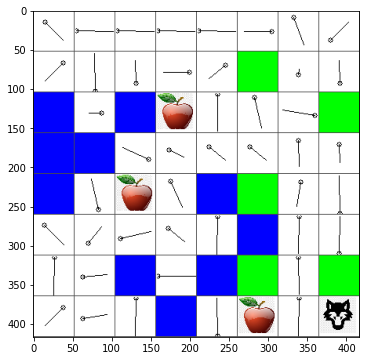

In [43]:
m.plot(Q)

## 정책 확인하기

Q-Table은 각 상태에서 각 행동의 "매력도"를 나열하기 때문에, 이를 사용하여 우리 세계에서 효율적인 이동 경로를 정의하는 것은 비교적 간단합니다. 가장 간단한 경우, Q-Table 값이 가장 높은 행동을 선택하면 됩니다:


In [13]:
# code block 9

2

위의 코드를 여러 번 실행해 보면, 가끔 코드가 그냥 "멈춰버리고", 노트북에서 STOP 버튼을 눌러 중단해야 하는 경우가 있다는 것을 알 수 있습니다.

> **작업 1:** `walk` 함수에서 경로의 최대 길이를 특정 단계 수(예: 100)로 제한하도록 수정하고, 위 코드가 가끔 이 값을 반환하는지 확인하세요.

> **작업 2:** `walk` 함수가 이전에 이미 방문했던 장소로 다시 돌아가지 않도록 수정하세요. 이렇게 하면 `walk`가 반복 루프에 빠지는 것을 방지할 수 있지만, 에이전트가 탈출할 수 없는 위치에 "갇히는" 상황은 여전히 발생할 수 있습니다.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


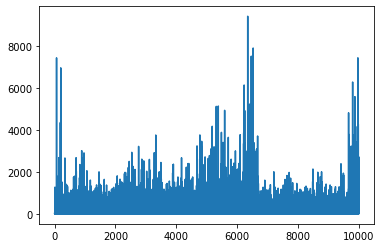

In [57]:
plt.plot(lpath)

## 연습
## 더 현실적인 피터와 늑대의 세계



---

**면책 조항**:  
이 문서는 AI 번역 서비스 [Co-op Translator](https://github.com/Azure/co-op-translator)를 사용하여 번역되었습니다. 정확성을 위해 최선을 다하고 있지만, 자동 번역에는 오류나 부정확성이 포함될 수 있습니다. 원본 문서를 해당 언어로 작성된 상태에서 권위 있는 자료로 간주해야 합니다. 중요한 정보의 경우, 전문 번역가에 의한 번역을 권장합니다. 이 번역 사용으로 인해 발생하는 오해나 잘못된 해석에 대해 당사는 책임을 지지 않습니다.  
